# Advances in Machine Learning with Big Data

### Dr Jeremy Large and Dr Matthias Qian
#### jeremy.large@economics.ox.ac.uk
#### matthias.qian@economics.ox.ac.uk
### Trinity 2020



... make the notebook pick it up if I change the functions in my libraries behind the scenes:

In [1]:
%load_ext autoreload
%autoreload 2

... classic python libraries that are almost always needed for machine learning work:

In [42]:
import sys
import os
import pandas as pd
import logging
%matplotlib notebook

... now I tell the code where to look for the libraries I wrote for the course, as well as where to dump data:

In [3]:
# point at library; I need some lessons on doing good PYTHONPATHs:
REPO_DIR = os.path.dirname(os.getcwd())

UCI_LIB = os.path.join(REPO_DIR, 'lib')
UCI_DATA = os.path.join(REPO_DIR, 'data') 

sys.path.append(UCI_LIB)

logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO)

In [4]:
UCI_DATA_FILE = os.path.join(UCI_DATA, 'raw.csv') 

... among other things we created a path name where we can later save a file:

In [5]:
print(UCI_DATA_FILE)

C:\Users\Jeremy Large\Documents\professional\Oxford Work\ML Lectures\ox-sbs-ml-bd\data\raw.csv


... so, now I can tell the code to go looking for my behind-the-scenes functions:

In [6]:
from uci_retail_data.stock_codes import is_invalid, customer_code, stock_code_to_num, invalid_series, invoice_df
from uci_retail_data.uci_files import load_uci_file, REMOTE_FILE, SHEET_NAME

... for example, here's one of the variables we just went and obtained:

In [7]:
REMOTE_FILE

'https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx'

# Overview of the course

## 1. Introducing the dataset

In [8]:
print(REMOTE_FILE)
print(SHEET_NAME)

https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx
Year 2009-2010


In [9]:
if os.path.exists(UCI_DATA_FILE):
    df = load_uci_file(UCI_DATA_FILE, SHEET_NAME)
else:
    df = load_uci_file(REMOTE_FILE, SHEET_NAME)
    df.to_csv(UCI_DATA_FILE)
    logging.info('Saving a copy to ' + UCI_DATA_FILE)

2020-02-12 16:57:30,957 INFO:Loading https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx , sheet Year 2009-2010
2020-02-12 17:01:08,798 INFO:Loaded https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx , sheet Year 2009-2010
2020-02-12 17:01:18,010 INFO:Saving a copy to C:\Users\Jeremy Large\Documents\professional\Oxford Work\ML Lectures\ox-sbs-ml-bd\data\raw.csv


In [10]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [11]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
Invoice        525461 non-null object
StockCode      525461 non-null object
Description    522533 non-null object
Quantity       525461 non-null int64
InvoiceDate    525461 non-null datetime64[ns]
Price          525461 non-null float64
Customer ID    417534 non-null float64
Country        525461 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,525461.0,10.337667,107.424110,-9600.00,1.00,3.0,10.00,19152.00
Price,525461.0,4.688834,146.126914,-53594.36,1.25,2.1,4.21,25111.09
Customer ID,417534.0,15360.645478,1680.811316,12346.00,13983.00,15311.0,16799.00,18287.00


... half a million rows is _not that much_ these days, but will be a good illustration for this course

In [20]:
invalids = invalid_series(df)

In [21]:
df.loc[invalids].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia


In [22]:
inv = invoice_df(df, invalid_series=invalids)

In [30]:
inv.head()

,customer,n_codes,n_items,spend,hour,month,words,words_per_item
Invoice,,,,,,,,
489434,13085.0,8,166,505.30,7,200912,"{TRINKET, BALL, CERAMIC, DOORMAT, LIGHTS, PINK...",3.625000
489435,13085.0,4,60,145.80,7,200912,"{DOG, SPOONS, BALL, HEART, BOWL, CAT, MEASURIN...",4.000000
489436,13078.0,19,193,630.33,9,200912,"{BISCUITS, OF, SMALL, TRELLIS, LARGE, CLASSIC,...",3.315789
489437,15362.0,23,145,310.75,9,200912,"{PAPER, OF, SMALL, CUPS, LARGE, RETRO, STOCKIN...",3.000000
489438,18102.0,17,826,2286.24,9,200912,"{BISCUITS, OF, LOLA, COASTER, CHARLIE, DOORSTO...",2.235294


<IPython.core.display.Javascript object>


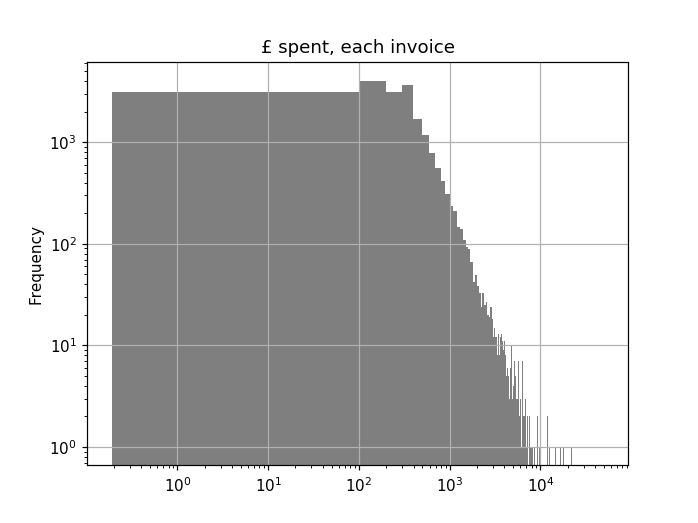

In [43]:
_ = inv.spend.plot.hist(logy=True, logx=True, bins=500, 
                        title='£ spent, each invoice', 
                        color='k', alpha=0.5, grid=True)

### How could we make money from this data?

 * relate to prices on markets

 * figure out when/where/how/why products are being bought

 * anticipate government or other official statistics
 
 * ...

### What new possibilities does this data open up for us?

* Regressors -> numerous
* Datapoints -> very numerous
* (have to clean … a lot)
* Computers -> faster

### Techniques covered in this course:

Jeremy Large:
 * Resampling methods
   * Cross-validation
   * Bootstrap
 * Flexible regression
   * Non-linear regression
     * Generalized additive model
     * Projection pursuit
     * Single layer Neural Net Perceptron
   * Step functions in regression
     * Step function
     * Decision tree
     * Bagging
     * Random forest
     * Boosting

Matthias Qian:
 * Neural Net
 * Recursive Neural Net
 * ... tbc ...

### Important techniques not covered in this course:

 * Predictor selection (Ridge regression / LASSO(Lars) / PCR / Resampling & brute force)
 
 * Classification

### Comments:

 * Burning Glass will be our dataset throughout this course
 
   * we will provide access to the data as follows ...